# **INTRADAY PREDICTIONS USING MACHINE LEARNING**

The data for astrazenca company which is among the top 15 companies in FTSE100 will be taken from YahooFinance and will be used for prediction.

In [1]:
#Importing all the necessary libraries and modules
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
#Insatlling mplfinance for plotting candle stick graphs
!pip install mplfinance
import mplfinance as mpf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.tree  import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import  Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.5 MB/s eta 0:00:00


In [2]:
#Fetching the data of Apple from Yahoo Finance
data = yf.download('AAPL', start='2000-01-01', end=datetime.now())
df = pd.DataFrame()
df = data
print('The dataframe containing Apple data is : ', df.head())


print('\n The columns in the dataframe is : ', df.columns)
#Initial Data Exploration
print('\n The dataframe is : \n', df.tail())
print('\n The shape of the parameters dataframe is : ', df.shape)
print('\n The description of the  dataframe is : \n', df.describe())
print('\n The information of the columns in the parameters dataframe is :')
print(df.info())

[*********************100%%**********************]  1 of 1 completed

The dataframe containing Apple data is :                  Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2000-01-03  0.936384  1.004464  0.907924  0.999442   0.846127  535796800
2000-01-04  0.966518  0.987723  0.903460  0.915179   0.774790  512377600
2000-01-05  0.926339  0.987165  0.919643  0.928571   0.786128  778321600
2000-01-06  0.947545  0.955357  0.848214  0.848214   0.718098  767972800
2000-01-07  0.861607  0.901786  0.852679  0.888393   0.752113  460734400

 The columns in the dataframe is :  Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

 The dataframe is : 
                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-04-25  169.529999  170.610001  168.149994  169.889999  169.889999   
2024-04-26  169.880005  171.339996  169.179993  169.300003  169.300003   
2024-04-29  

# **EXPLORATORY DATA ANALYSIS of the DATAFRAME**

## **Time Series graph for Closing Price**

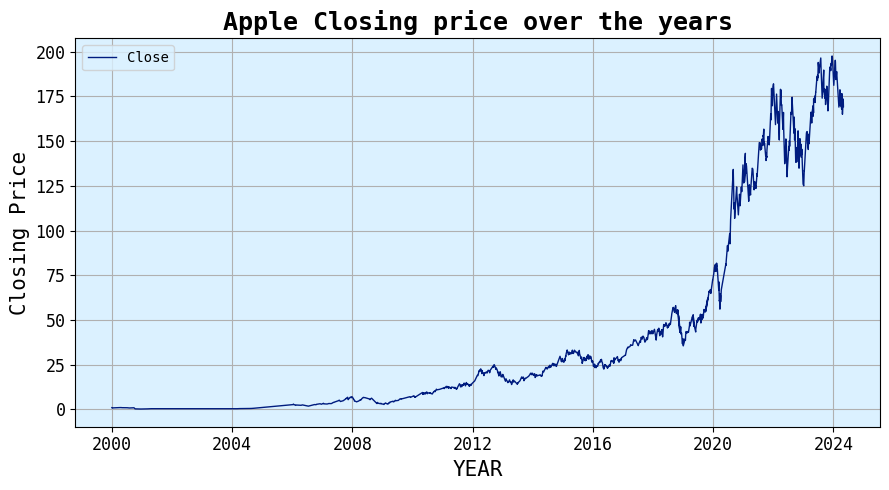

In [12]:
#Setting the graph style and the font style.
plt.style.use('seaborn-v0_8-dark-palette')
plt.rcParams["font.family"] = "monospace"

#Function definition for plotting the  time series graph
def time_series(df):
  plt.plot(df.index.values , df['Close'], label = 'Close')
  plt.title('Apple Closing price over the years', fontsize = 18, fontweight='bold')
  plt.xlabel('YEAR', fontsize = 15)
  plt.ylabel('Closing Price', fontsize = 15)
  plt.xticks(fontsize = 12)
  plt.yticks(fontsize = 12)
  plt.legend()
  plt.tight_layout()
  plt.grid()
  plt.rcParams["figure.figsize"] = (9, 5)
  plt.show()

#Calling the function to plot the time series of closing price
time_series(df)

## **Outlier Detection of the Closing Price**

Number of rows before removing outliers: 6119
Number of rows after removing outliers: 6119


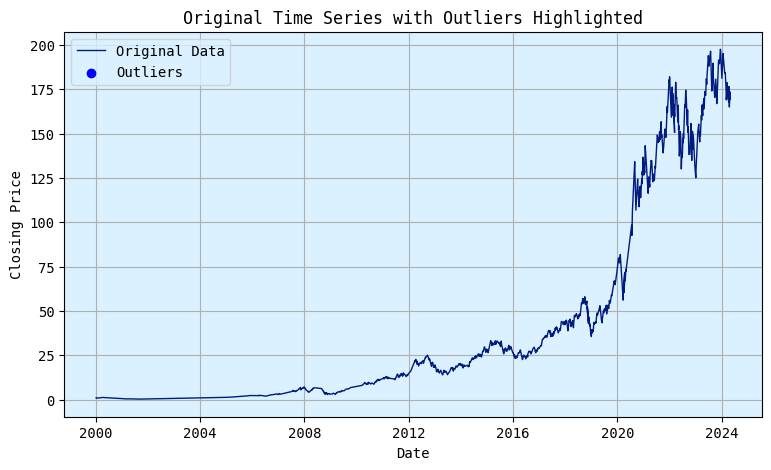

In [13]:
#Function definition for outlier_detection
def outlier_detection(df):

  # Calculate Z-score for each data point
  z_scores = np.abs((df['Close'] - df['Close'].mean()) / df['Close'].std())

  # Define a threshold for identifying outliers (e.g., z-score > 4 or < -4)
  threshold = 3

  # Identify outliers
  outliers = df[(z_scores > threshold) | (z_scores < -threshold)]

  # Print number of rows before and after removing outliers
  print("Number of rows before removing outliers:", len(df))
  print("Number of rows after removing outliers:", len(df) - len(outliers))

  # Remove outliers from the DataFrame
  df = df[(z_scores <= threshold) & (z_scores >= -threshold)]

  # Plot the cleaned time series
  plt.rcParams["figure.figsize"] = (9,5)
  plt.plot(df.index, df['Close'], label='Original Data')
  plt.scatter(outliers.index, outliers['Close'], color='blue', label='Outliers')
  plt.xlabel('Date')
  plt.ylabel('Closing Price')
  plt.title('Original Time Series with Outliers Highlighted')
  plt.legend()
  plt.grid()
  plt.show()


  return df

#Calling the function outlier_detection
df = outlier_detection(df)

## **SMA-50 and SMA-200 graphs for Closing Price**

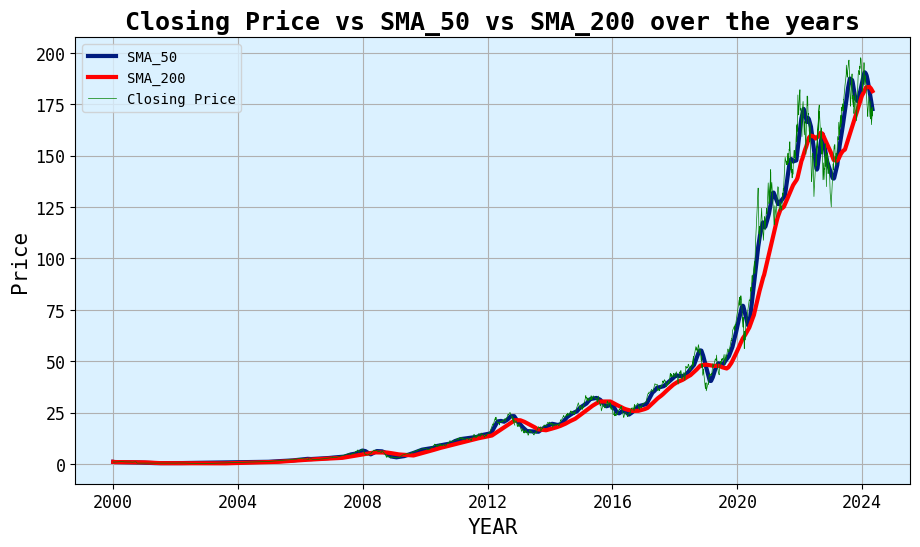

In [14]:
#Function definition for calculating SMA-50 and SMA-200
def sma_50_200(df):

  #Calculating Simple Moving Average for the past 50 days of closing price.
  df['MA_50'] = df['Close'].rolling(window=50, min_periods=1).mean()

  #Calculating Simple Moving Average for the past 200 days of closing price
  df['MA_200'] = df['Close'].rolling(window=200, min_periods=1).mean()

  #Plotting the graphs for simple moving average 50 and simple moving average 200.
  plt.plot(df.index.values, df['MA_50'], label = 'SMA_50', linestyle = '-', linewidth = 3)
  plt.plot(df.index.values, df['MA_200'], label = 'SMA_200', linestyle = '-', linewidth = 3,  color = 'red')
  plt.plot(df.index.values, df['Close'], label = 'Closing Price', linestyle = '-', linewidth = 0.5, color = 'green')
  plt.legend()
  plt.tight_layout()
  plt.grid()
  plt.title('Closing Price vs SMA_50 vs SMA_200 over the years', fontsize = 18, fontweight='bold')
  plt.xlabel('YEAR', fontsize = 15)
  plt.ylabel('Price', fontsize = 15)
  plt.xticks(fontsize = 12)
  plt.yticks(fontsize = 12)
  plt.rcParams["figure.figsize"] = (9,5)
  plt.show()
  return df


#Calling the function sma_50_200
df = sma_50_200(df)

## **Daily Returns graph**

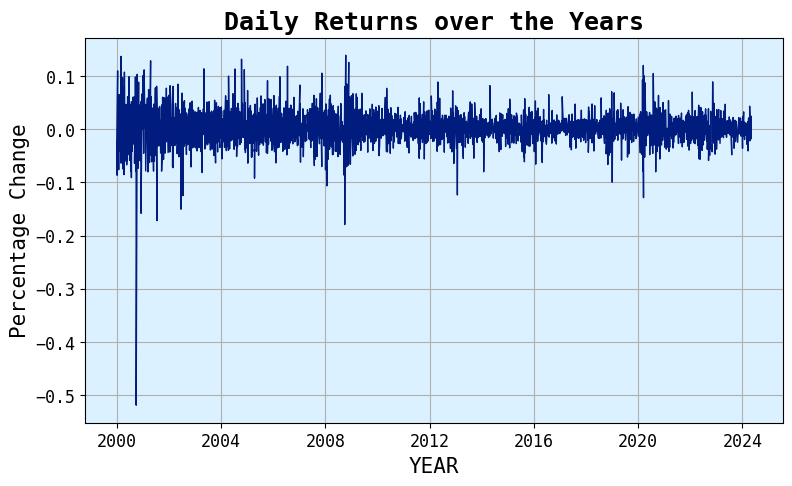

In [15]:
#Function definition for calculating and plotting daily returns
def daily_returns(df):

  #Calculating daily returns
  df['Daily Returns'] = df['Close'].pct_change()

  #Plotting the graph for daily returns
  plt.plot(df.index.values, df['Daily Returns'], label = 'Daily Returns')
  plt.title('Daily Returns over the Years', fontsize = 18, fontweight='bold')
  plt.ylabel('Percentage Change', fontsize = 15)
  plt.xlabel('YEAR', fontsize = 15)
  plt.xticks(fontsize = 12)
  plt.yticks(fontsize = 12)
  plt.rcParams["figure.figsize"] = (9,5)
  plt.grid()
  plt.show()
  return df

#Calling the function daily_returns
df = daily_returns(df)

## **Volume vs Closing Price graph**

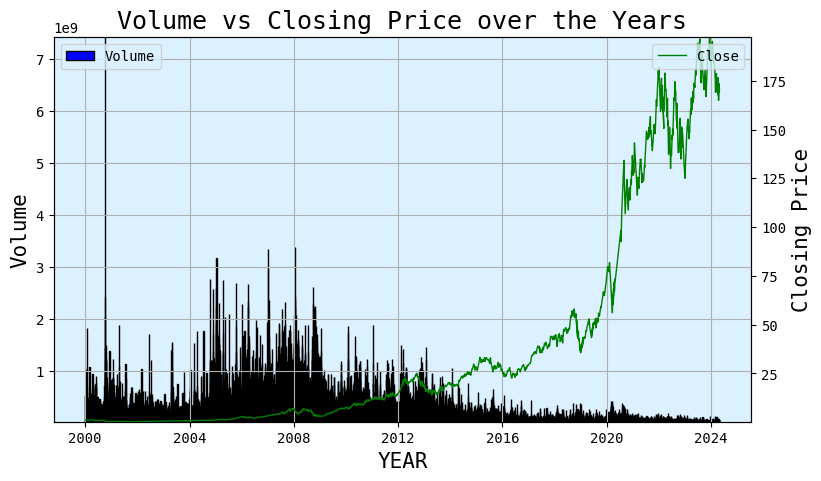

In [16]:
#Function definintion for volume_closing
def volume_closing(df):

  #Plotting two subplots for volume and closing price
  plt.rcParams["figure.figsize"] = (9,5)
  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx()
  ax2.plot(df.index.values, df['Close'], label = 'Close', color = 'g')
  ax1.bar(df.index.values, df['Volume'], label = 'Volume', color = 'b')
  ax1.set_xlabel('YEAR', fontsize = 15)
  ax2.set_ylabel('Closing Price', fontsize = 15)
  ax1.set_ylabel('Volume', fontsize = 15)
  ax1.set_title('Volume vs Closing Price over the Years', fontsize = 18)
  ax1.grid()
  ax1.legend(loc = 'upper left')
  ax2.legend(loc = 'upper right')
  ax2.set_ylim(min(df['Close']), max(df['Close']))
  ax1.set_ylim(min(df['Volume']), max(df['Volume']))
  plt.show()


#Calling the function volume_closing
volume_closing(df)

## **Seasonality graphs**

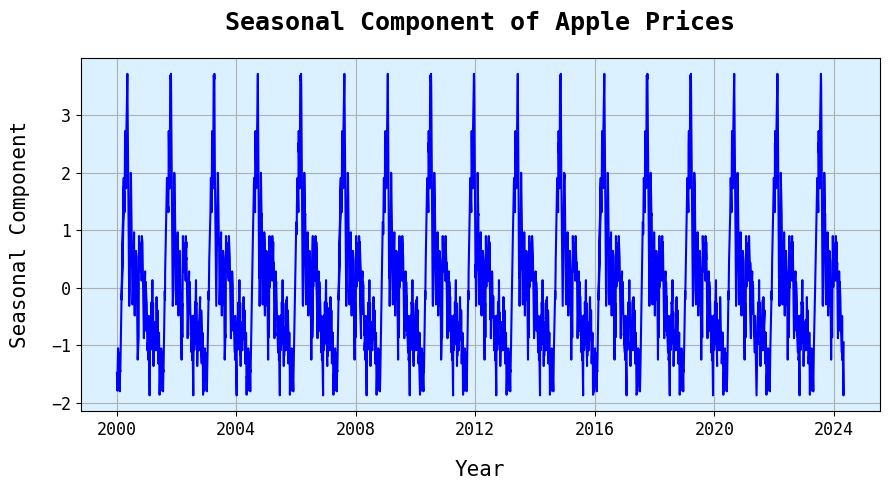

In [17]:
#Function definition for seasonal_decomposition
def seasonal_decomposition(df):

  #Decompose closing prices into trend, seasonal, and residual components
  decomposition = seasonal_decompose(df['Close'],
                                   model='additive', period=365)
  seasonal = decomposition.seasonal
  plt.rcParams["figure.figsize"] = (9,5)
  plt.plot(seasonal, color='blue', linewidth=1.5)
  plt.title('Seasonal Component of Apple Prices',
          fontsize=18, pad=20, fontweight='bold')
  plt.xlabel('Year', fontsize=15, labelpad=15)
  plt.ylabel('Seasonal Component', fontsize=15, labelpad=15)
  plt.xticks(fontsize = 12)
  plt.yticks(fontsize = 12)
  plt.grid()
  plt.tight_layout()
  plt.show()
  return df


#Calling the function seasonal_decomposition
df = seasonal_decomposition(df)

## **Volatility graph**

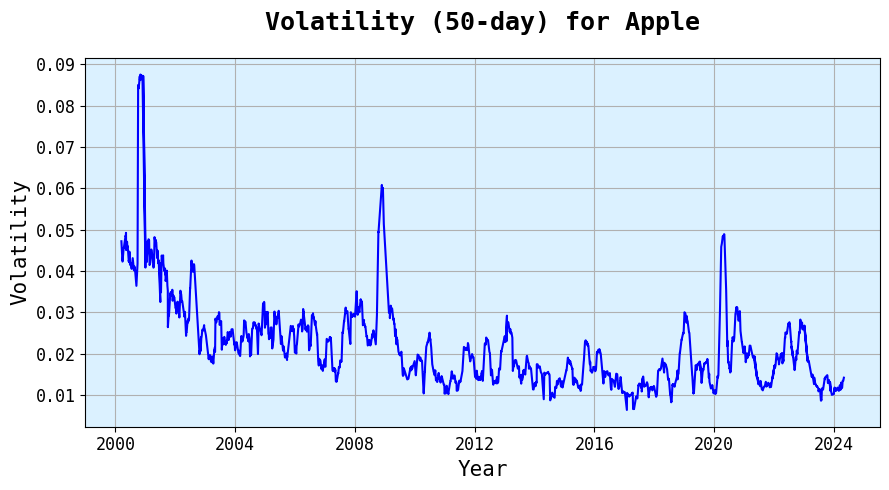

In [18]:
#Function definition for volatility
def volatility(df):

  #Calculating the volatility
  df['Volatility'] = df['Daily Returns'].rolling(window=50).std()

  #Plotting the volatility graph
  plt.rcParams["figure.figsize"] = (9,5)
  plt.plot(df.index.values, df['Volatility'], label='Volatility (50-day)', color='blue', linewidth=1.5)
  plt.title('Volatility (50-day) for Apple', fontsize=18, pad=20, fontweight='bold')
  plt.xlabel('Year', fontsize = 15)
  plt.ylabel('Volatility', fontsize = 15)
  plt.grid()
  plt.xticks(fontsize = 12)
  plt.yticks(fontsize = 12)
  plt.tight_layout()
  plt.show()
  return df

#Calling the function volatility
df = volatility(df)

## **Candle Stick Graphs**

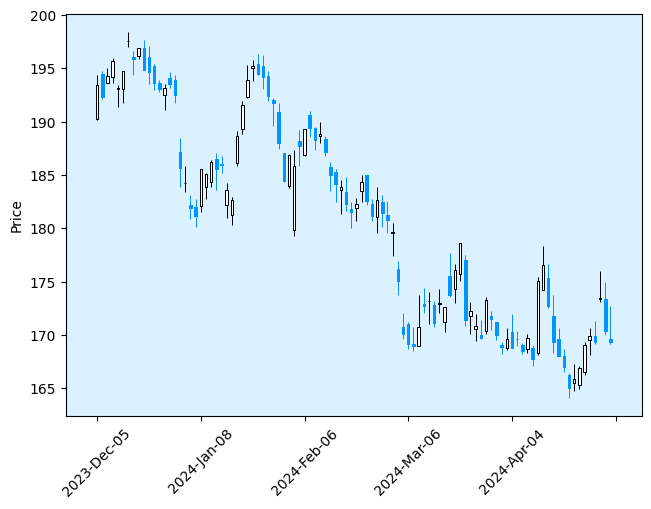

In [10]:
#Plotting the candlestick graphs for the past 100 days
dfcandle = df.tail(100)
mpf.plot(dfcandle, type = "candle", style = 'blueskies')

## **FEATURE GENERATION**
Creating new features that can be used to train the models.

In [19]:
#Function definition to generate more feature
def feature_generation(df):

  #Create a new column called tomorrow where the closing price for the next day will be stored.
  df['Tomorrow'] = df['Close'].shift(-1)

  #Creating the target column for the binary classification problem
  df['Target'] = (df['Tomorrow'] > df['Close']).astype(int)

  #Creating three more features which are closing price for the past three days
  df['Close Prev 1 day'] = df['Close'].shift(+1)
  df['Close Prev 2 day'] = df['Close'].shift(+2)
  df['Close Prev 3 day'] = df['Close'].shift(+3)

  #Calculating rolling mean for different horizons to generate ratios and trends
  horizons = [2,5,60,250,1000]

  for horizon in horizons:
    rolling_averages = df.rolling(horizon).mean()
    ratio_column = f"Close_Ratio_{horizon}"
    df[ratio_column] = df['Close'] / rolling_averages['Close']

    trend_column = f"Trend_{horizon}"
    df[trend_column] = df.shift(1).rolling(horizon).sum()['Target']

  #Printing the altered dataframe with new features
  print('The dataframe with the new features is :  \n', df.head(5))
  print('\n The columns in the dataframe is  : ', df.columns)

  #Returning the dataframe
  return df




#Calling feature_generation function
df = feature_generation(df)

The dataframe with the new features is :  
                 Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2000-01-03  0.936384  1.004464  0.907924  0.999442   0.846127  535796800   
2000-01-04  0.966518  0.987723  0.903460  0.915179   0.774790  512377600   
2000-01-05  0.926339  0.987165  0.919643  0.928571   0.786128  778321600   
2000-01-06  0.947545  0.955357  0.848214  0.848214   0.718098  767972800   
2000-01-07  0.861607  0.901786  0.852679  0.888393   0.752113  460734400   

               MA_50    MA_200  Daily Returns  Volatility  ...  Close_Ratio_2  \
Date                                                       ...                  
2000-01-03  0.999442  0.999442            NaN         NaN  ...            NaN   
2000-01-04  0.957310  0.957310      -0.084310         NaN  ...       0.955990   
2000-01-05  0.947731  0.947731       0.014633         NaN  ...       1.007263   
2000-01-06  0.9228

## **Data PreProcessing**

In [20]:
#Function definition for preprocessing and scaling
def preprocessing(df):

  #Checking for null or NaN values and removing them
  print('The number of null values in the dataframe is : ', df.isnull().sum().sum())
  print('The number of NaN values in the dataframe is : ', df.isna().sum().sum())

  #Removing the rows with null values
  df = df.dropna()
  print('The number of null values in the dataframe is : ', df.isnull().sum().sum())
  print('The number of NaN values in the dataframe is : ', df.isna().sum().sum())

  #Printing the dataframe after scaling and removing null values
  print('The dataframe after preprocessing is  : \n', df.head(5))

  return df

#Calling function preprocessing_scaling
df = preprocessing(df)

The number of null values in the dataframe is :  2687
The number of NaN values in the dataframe is :  2687
The number of null values in the dataframe is :  0
The number of NaN values in the dataframe is :  0
The dataframe after preprocessing is  : 
                 Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2003-12-26  0.363393  0.373393  0.363214  0.371071   0.314149  103695200   
2003-12-29  0.373393  0.377857  0.372500  0.377679   0.319743  233458400   
2003-12-30  0.378214  0.383929  0.377679  0.380000   0.321708  204853600   
2003-12-31  0.381250  0.384464  0.378214  0.381607   0.323068  174451200   
2004-01-02  0.384821  0.388393  0.378214  0.380000   0.321708  144642400   

               MA_50    MA_200  Daily Returns  Volatility  ...  Close_Ratio_2  \
Date                                                       ...                  
2003-12-26  0.385071  0.347896       0.018128    0.0227

## **FEATURE SELECTION TECHNIQIUES**

### **CORRELATION MATRIX**

The correlation values of other columns with the Target column : 

Close_Ratio_60      0.022605
Close_Ratio_250     0.017077
Trend_5             0.008280
Trend_60            0.005061
Trend_250           0.003706
Volume             -0.003500
Close_Ratio_1000   -0.005860
Volatility         -0.009602
Trend_2            -0.013281
Close_Ratio_5      -0.018419
MA_200             -0.020079
MA_50              -0.020915
Close Prev 2 day   -0.021301
Close Prev 3 day   -0.021398
Close Prev 1 day   -0.021517
Adj Close          -0.021520
Low                -0.021717
High               -0.021765
Open               -0.021834
Close              -0.021897
Close_Ratio_2      -0.028649
Daily Returns      -0.028840
Trend_1000         -0.031031
Name: Target, dtype: float64
The heatmamp of the correlation matrix is  : 



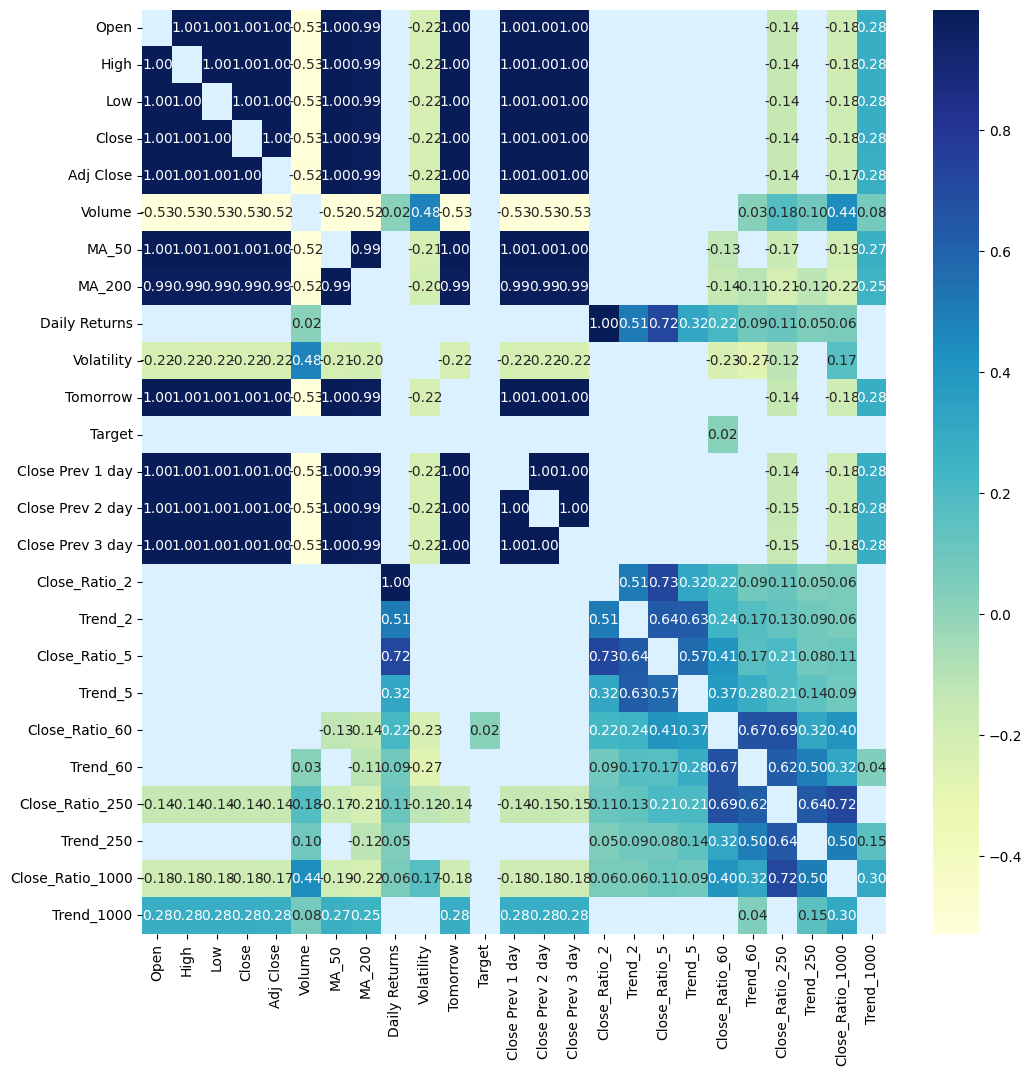

In [ ]:
#Function definition for correlation matrix and values
def correlation_values(df):

  #Printing the correlation values of only  the target column with the other columns
  print('The correlation values of other columns with the Target column : \n')
  print(df.corr()['Target'].drop(['Target', 'Tomorrow']).sort_values(ascending=False))
  mask = ((df.corr() > -1) & (df.corr() < -0.09)) | ((df.corr() > 0.02) & (df.corr() < 1))
  plt.rcParams["figure.figsize"] = (12,12)

  #Displaying the heatmap
  print('The heatmamp of the correlation matrix is  : \n')
  sns.heatmap(df.corr(),  cmap='YlGnBu', mask=~mask,  annot=True, fmt=".2f")

#Calling the correlation_values function
correlation_values(df)

# **REGRESSION IMPLEMENTATAION**
The stock closing price for the next day will be predicted using regression machine learning algorithms after hyper parameter tuning. This has to be done so that the predicted closing price for the next day can be aslo included as one of the features while training machine learning models for binary classification. The four machine learning algorithms that will be used for regresion implementation is
*   Random Forest Regressor
*   XGBoost Regressor
*   Support Vector Regressor
*   Lasso Regression

These models will be compared and the best model will be selected



## **FEATURE SELECTION for REGRESSION using P-Value**

In [21]:
#Using p_value method to understand the features to be selected for regression
import statsmodels.api as sm
X = df.drop(columns = ['Tomorrow', 'Target' ], axis = 1)
y = df['Tomorrow']
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Tomorrow   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.367e+05
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        06:24:35   Log-Likelihood:                -8392.9
No. Observations:                5118   AIC:                         1.683e+04
Df Residuals:                    5094   BIC:                         1.699e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               25.5584     70.849  

### **Splitting the data into training and testing**

In [22]:
#Selecting the columns based on the p-values obtained
X =  X[['Open', 'Close', 'MA_200', 'Close Prev 1 day', 'Close_Ratio_2', 'Daily Returns', 'Volatility', 'Trend_2']]

#Scaling the data using Standard Scaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#Splitting the data sequentially for regression algorithms implementation
train_size = int(len(X) * 0.80)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

## **Regression Implementation with default parameters**

In [23]:
#Dictionary that contains all the 4 models for regression implementation
models = {
        'Random Forest Regressor': RandomForestRegressor(),
        'Lasso Regression': Lasso(),
        'XG Boost': xgb.XGBRegressor(),
        'Support Vector Regression' : SVR()
    }


#Function definition for regression_default_params
def regression_default_params(X_train, X_test, y_train, y_test, models):
    report = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        #Measuring the metrics
        mae = round(mean_absolute_error(y_test, y_pred),2)
        mse = round(mean_squared_error(y_test, y_pred),2)
        rmse = round(mean_squared_error(y_test, y_pred, squared=False),2)
        r2 = round(r2_score(y_test, y_pred),2)

        report[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

    return report

#Calling the function regression_default_params
results = regression_default_params(X_train, X_test, y_train, y_test, models)
print('The results of the regression implementation with default parameters are : \n', results)

The results of the regression implementation with default parameters are : 
 {'Random Forest Regressor': {'MAE': 69.48, 'MSE': 5646.4, 'RMSE': 75.14, 'R2': -5.54}, 'Lasso Regression': {'MAE': 25.29, 'MSE': 674.07, 'RMSE': 25.96, 'R2': 0.22}, 'XG Boost': {'MAE': 71.39, 'MSE': 5860.14, 'RMSE': 76.55, 'R2': -5.79}, 'Support Vector Regression': {'MAE': 122.0, 'MSE': 16246.26, 'RMSE': 127.46, 'R2': -17.82}}


## **Regression Implementation with hyper parameter tuning**

In [24]:
#Defining the parameters that will be used for hyper parameter tuning
params = {
    "Random Forest Regressor": {
        'n_estimators': [8, 16, 32, 64, 128]
    },
    "Lasso Regression": {
        'alpha': [0.01, 0.1, 1, 10]
    },
    "XG Boost": {
        'n_estimators': [8, 16, 32, 64, 128, 256],
        'learning_rate': [0.1, 0.01, 0.05, 0.001]
    },
    "Support Vector Regression": {
        'kernel': ['linear', 'poly', 'rbf'],
        'C': [0.1, 1, 10, 100],
        'epsilon': [0.01, 0.1, 1],
        'gamma': ['scale', 'auto']
    }
}



#Function definition for regression_hyper_parameter
def regression_hyper_parameter(X_train, X_test, y_train, y_test, models, params):
    report = {}
    for model_name, model in models.items():
        param = params[model_name]

        #Using grid search for hyperparameter tuning
        gs = GridSearchCV(estimator = model,
                          param_grid = param,
                          scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error',  'r2'],
                          refit = 'r2',   #here the model with best r2 value will be considered to be best
                          cv = 2,         #here five fold cross validation is used.
                          verbose = 0)

        gs_result = gs.fit(X_train, y_train)

        #Printing the performance of parameters of each model
        print('Model : ', model_name)
        print('The best set of parameters are : ', gs.best_params_)
        print('The best R2 score with the best set of parameters are : ', gs.best_score_)

        #Now training the model with the best set of parametrs
        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)

        y_pred = gs_result.best_estimator_.predict(X_test)

        #Calculating the performance metrics of each model
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)

        report[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

    return report

results = regression_hyper_parameter(X_train, X_test, y_train, y_test, models, params )
print('The results of regression with hyper parameter tuning for every model : \n')
print(results)

Model :  Random Forest Regressor
The best set of parameters are :  {'n_estimators': 16}
The best R2 score with the best set of parameters are :  -2.924573567933826
Model :  Lasso Regression
The best set of parameters are :  {'alpha': 0.01}
The best R2 score with the best set of parameters are :  0.9941562082201978
Model :  XG Boost
The best set of parameters are :  {'learning_rate': 0.1, 'n_estimators': 64}
The best R2 score with the best set of parameters are :  -3.2121556668157436
Model :  Support Vector Regression
The best set of parameters are :  {'C': 100, 'epsilon': 0.01, 'gamma': 'scale', 'kernel': 'linear'}
The best R2 score with the best set of parameters are :  0.9976685482338776
The results of regression with hyper parameter tuning for every model : 

{'Random Forest Regressor': {'MAE': 70.29438249510713, 'MSE': 5757.103951294661, 'RMSE': 75.87558204913265, 'R2': -5.667659394741933}, 'Lasso Regression': {'MAE': 2.385139205740721, 'MSE': 9.732775204476507, 'RMSE': 3.119739605

## **Predicting the next day closing price**
The predicted closing price for the next day will be used as a feature for binary classification algorithms


In [25]:
model = SVR( kernel = 'linear', C = 100, epsilon = 0.01, gamma = 'scale')
model.fit(X_train, y_train)
Tomorrow_Predicted = model.predict(X)
#Comparing the predicted values and the actual values
print(y_train[0:20])
print(Tomorrow_Predicted[0:20])

#Creating a new column called tomorrow_predicted in dataframe df
df['Tomorrow_Predicted'] = Tomorrow_Predicted

Date
2003-12-26    0.377679
2003-12-29    0.380000
2003-12-30    0.381607
2003-12-31    0.380000
2004-01-02    0.395893
2004-01-05    0.394464
2004-01-06    0.403393
2004-01-07    0.417143
2004-01-08    0.410714
2004-01-09    0.423750
2004-01-12    0.430714
2004-01-13    0.432143
2004-01-14    0.408036
2004-01-15    0.405714
2004-01-16    0.405893
2004-01-20    0.403750
2004-01-21    0.396071
2004-01-22    0.402857
2004-01-23    0.410893
2004-01-26    0.411964
Name: Tomorrow, dtype: float64
[0.37916515 0.38695958 0.38770646 0.38927129 0.38340163 0.40468609
 0.39735583 0.40937192 0.42803331 0.41208957 0.43124567 0.44101481
 0.43969601 0.40193811 0.40415933 0.40832891 0.40552477 0.3928682
 0.40809251 0.41926352]


# **BINARY CLASSIFICATION**
The binary classification algorithms will be used here to predict whether the closing price will be higher or lower compared to the previous day's closing price. The binary classification will be done using without hyper parameter tuning and hyper parameter tuning with GridSearchCV.
The binary classification machine learning algorithms that will be used are


*   Random Forest Classifier
*   Support Vector Classifier
*   XGBoost Classifier
*   Logistic Regression

These moodels will be compared and the best performing model will be selected







## **RFE Method for Feature Selection For Binary Classification**

In [ ]:
#Function decinition for recursive feature elimination
def rfe_selection(df):

  #Recursive feature elimination method for feature selection
  X = df.drop(columns = ['Target', 'Tomorrow'], axis = 1)
  y = df['Target']
  rfe = RFE(estimator =  DecisionTreeClassifier(), n_features_to_select = 14)
  rfe.fit(X, y)
  for i,col in zip(range(X.shape[1]), X.columns):
    print(f"{col} selected columns are {rfe.support_[i]} rank = {rfe.ranking_[i]}")

#Calling the function rfe_selection
rfe_selection(df)

Open selected columns are True rank = 1
High selected columns are False rank = 7
Low selected columns are False rank = 8
Close selected columns are False rank = 9
Adj Close selected columns are False rank = 4
Volume selected columns are True rank = 1
MA_50 selected columns are True rank = 1
MA_200 selected columns are True rank = 1
Daily Returns selected columns are True rank = 1
Volatility selected columns are True rank = 1
Close Prev 1 day selected columns are False rank = 5
Close Prev 2 day selected columns are False rank = 3
Close Prev 3 day selected columns are True rank = 1
Close_Ratio_2 selected columns are True rank = 1
Trend_2 selected columns are False rank = 10
Close_Ratio_5 selected columns are True rank = 1
Trend_5 selected columns are False rank = 6
Close_Ratio_60 selected columns are True rank = 1
Trend_60 selected columns are False rank = 2
Close_Ratio_250 selected columns are True rank = 1
Trend_250 selected columns are True rank = 1
Close_Ratio_1000 selected columns a

## **Splitting the Data into Train and Test for Binary Classification**

In [ ]:
#Setting the features which will be used to train the model
X = df[['MA_200', 'MA_50', 'Close', 'Close Prev 2 day', 'Close Prev 3 day',
         'Low', 'Close Prev 1 day', 'High', 'Open', 'Volatility', 'Trend_1000',
         'Daily Returns', 'Close_Ratio_2', 'Volume', 'Tomorrow']]


#Scaling the data for faster and better performance
scaler = MinMaxScaler(feature_range=(0,1))
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#Setting the target column
y =  df['Target']

#Splitting the dataset into train and test sequentially
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, shuffle = False)

## **Binary Classification without hyper-parameter tuning**

Classification Report of Model :  Logistic Regression
              precision    recall  f1-score   support

           0       0.48      1.00      0.65       491
           1       0.00      0.00      0.00       533

    accuracy                           0.48      1024
   macro avg       0.24      0.50      0.32      1024
weighted avg       0.23      0.48      0.31      1024

Classification Report of Model :  Random Forest Classifier
              precision    recall  f1-score   support

           0       0.48      1.00      0.65       491
           1       1.00      0.00      0.00       533

    accuracy                           0.48      1024
   macro avg       0.74      0.50      0.33      1024
weighted avg       0.75      0.48      0.31      1024

Classification Report of Model :  Support Vector Classifier
              precision    recall  f1-score   support

           0       0.46      0.05      0.09       491
           1       0.52      0.95      0.67       533

    accur

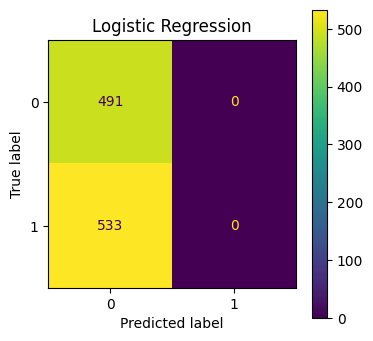

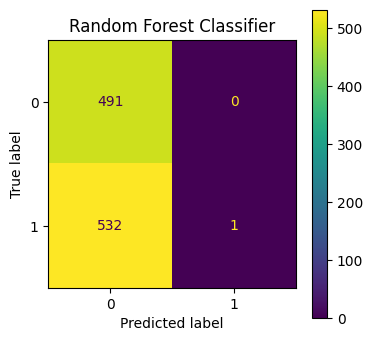

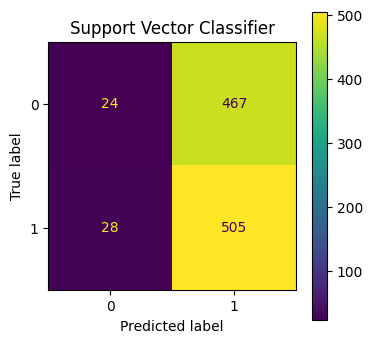

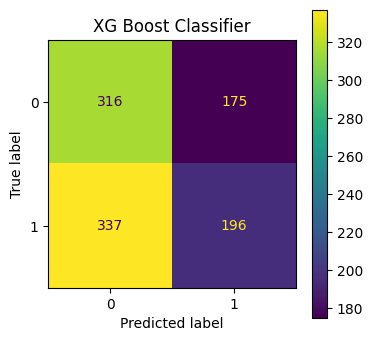

In [ ]:
#Defining the models for binary classification
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Support Vector Classifier': SVC(),
    'XG Boost Classifier': xgb.XGBClassifier()
}


# Function definition for binary classification using default parameters
def classification_default_params(X_train, X_test, y_train, y_test, models):
    results = {}
    for model_name, model in models.items():
        #Training every model with default parameters
        model.fit(X_train, y_train)

        #Prediction using trained models
        y_pred = model.predict(X_test)

        #Calculating different metrics to measure performance of every model
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        confusion_mat = confusion_matrix(y_test, y_pred)

        results[model_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Confusion Matrix': confusion_mat
        }
        #Printing the classification report of each model
        print('Classification Report of Model : ', model_name)
        print(classification_report(y_test,y_pred))

    return results

#Calling the function classification_default_params
results = classification_default_params(X_train, X_test, y_train, y_test, models)
#print('The results of binary classification models with default parameters are : ', results)

#Plotting the confusioin matrix for each model
plt.rcParams["figure.figsize"] = (4,4)
for model_name, model in results.items():
  cnmat = ConfusionMatrixDisplay(model['Confusion Matrix'])
  cnmat.plot()
  cnmat.ax_.set_title(model_name)

## **Binary Classification with Hyper-Parameter tuning**

Model :  Logistic Regression
The best set of parameters are :  {'C': 10, 'solver': 'liblinear'}
The best accuracy score with the best set of parameters are :  0.5487257105839014
Classification Report of Model :  Logistic Regression
              precision    recall  f1-score   support

           0       0.57      0.95      0.71       491
           1       0.88      0.35      0.50       533

    accuracy                           0.64      1024
   macro avg       0.73      0.65      0.61      1024
weighted avg       0.73      0.64      0.60      1024

Model :  Random Forest Classifier
The best set of parameters are :  {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 128}
The best accuracy score with the best set of parameters are :  0.49400276441841234
Classification Report of Model :  Random Forest Classifier
              precision    recall  f1-score   support

           0       0.48      0.90      0.62       491
           1       0.51      0.10     

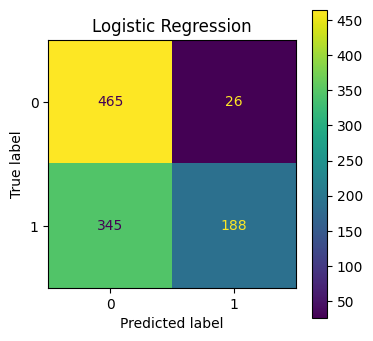

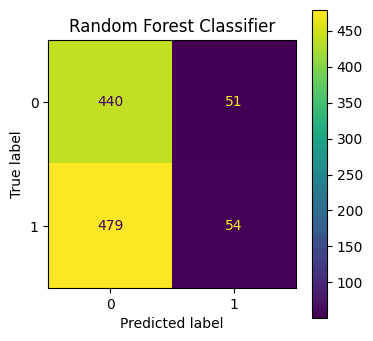

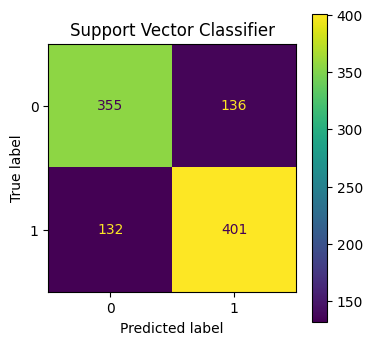

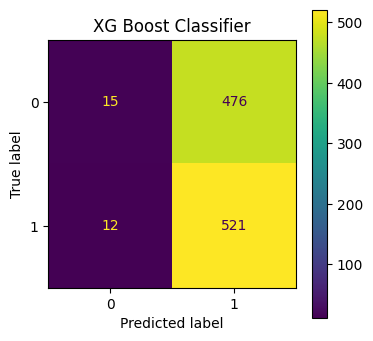

In [ ]:
#Defining the parameter for hyper parameter tuning with GridSearchCV
params = {
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    },
    "Random Forest Classifier": {
        'n_estimators': [16, 64, 128],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    "Support Vector Classifier": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'polynomial', 'sigmoid']
    },
    "XG Boost Classifier": {
        'learning_rate': [0.1, 0.01],
        'n_estimators': [32, 128],
        'max_depth': [3, 5],
        'subsample': [0.7, 0.9]
    }
}


#Function definition for classificatin_hyper_params
def classification_hyper_params(X_train, X_test, y_train, y_test, models, params):
    report = {}
    for model_name, model in models.items():
        param = params[model_name]

        #Using grid search for hyperparameter tuning
        gs = GridSearchCV(estimator = model,
                          param_grid = param,
                          scoring = ['accuracy', 'precision', 'recall', 'f1'],
                          refit = 'accuracy',
                          cv = 5,
                          verbose = 0)

        gs.fit(X_train, y_train)

        #Printing the performance of parameters of each model
        print('Model : ', model_name)
        print('The best set of parameters are : ', gs.best_params_)
        print('The best accuracy score with the best set of parameters are : ', gs.best_score_)

        #Now training the model with the best set of parametrs
        model.set_params(**gs.best_params_)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        #Calculating different metrics to measure performance of every model
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        confusion_mat = confusion_matrix(y_test, y_pred)

        results[model_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Confusion Matrix': confusion_mat
        }
        #Printing the classification report of each model
        print('Classification Report of Model : ', model_name)
        print(classification_report(y_test,y_pred))

    return results


results = classification_hyper_params(X_train, X_test, y_train, y_test, models, params)


#Plotting the confusioin matrix for each model
plt.rcParams["figure.figsize"] = (4,4)
for model_name, model in results.items():
  cnmat = ConfusionMatrixDisplay(model['Confusion Matrix'])
  cnmat.plot()
  cnmat.ax_.set_title(model_name)